The objective of this project is to perform classification of emotions in speech. This problem falls under audio classification. The dataset has been obtained from the following url: https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess 
In this dataset we have two female speakers (old and young), who speak out sentences with diferent emotions

We are going to use Google Colab for this project as it facilitates the usage of free GPU.

In [1]:
#commenting the below 2 lines as it contains information related to my Google account
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os, shutil
from math import ceil, floor
from IPython.display import display, Audio
from PIL import Image
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
def unzip_files(zipFilePath, unzip_directory):
    zipFile = ZipFile(zipFilePath, 'r')
    zipFile.extractall(unzip_directory)
    zipFile.close()

In [0]:
unzip_files('drive/My Drive/datasets/speech_emotion_recognition/TESS_Toronto_emotional_speech_set_data.zip', 'Unzipped_speech_recognition_data')

In [5]:
os.listdir('Unzipped_speech_recognition_data')

['TESS Toronto emotional speech set data']

In [6]:
os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data')

['YAF_sad',
 'OAF_Sad',
 'YAF_angry',
 'OAF_Pleasant_surprise',
 'OAF_Fear',
 'YAF_disgust',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'OAF_happy',
 'OAF_disgust',
 'YAF_fear',
 'OAF_angry',
 'OAF_neutral']

In [0]:
#there are total 7 emotions and let us store the values in the list, which will be helpful later
emotions = ['sad', 'angry', 'fear', 'disgust', 'happy', 'neutral', 'pleasant_surprise']

we have two female actresses, old and young, denoted with folders starting with OAF and YAF respectively. Let us check the number of files in each folder

In [8]:
for cur_folder in os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data'):
  print('current folder', cur_folder)
  print('number of files', len(os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data/' + cur_folder)))

current folder YAF_sad
number of files 200
current folder OAF_Sad
number of files 200
current folder YAF_angry
number of files 200
current folder OAF_Pleasant_surprise
number of files 200
current folder OAF_Fear
number of files 200
current folder YAF_disgust
number of files 200
current folder YAF_happy
number of files 200
current folder YAF_neutral
number of files 200
current folder YAF_pleasant_surprised
number of files 200
current folder OAF_happy
number of files 200
current folder OAF_disgust
number of files 200
current folder YAF_fear
number of files 200
current folder OAF_angry
number of files 200
current folder OAF_neutral
number of files 200


Now we are going to merge the old female and young female's audio clips in folders for all the emotions

In [0]:
os.mkdir('emotions_dataset_combined')
for emotion in emotions:
  os.mkdir('emotions_dataset_combined/' + emotion)

In [0]:
def move_audio_files(base_src, base_dst):

  for cur_folder in os.listdir(base_src):
    cur_emotion = cur_folder.lower().split('_')[1]
    if cur_emotion == 'pleasant':
      cur_emotion = 'pleasant_surprise'
  
    print('current emotion', cur_emotion)
    cur_audios = os.listdir(base_src + '/' + cur_folder)
    num_of_audios = len(cur_audios)
    print('number of audios', num_of_audios)
    for i in range(0, num_of_audios):
      cur_audio = cur_audios[i]
      src = base_src + '/' + cur_folder + '/' + cur_audio
      dst = base_dst + '/' + cur_emotion + '/' + cur_audio
      shutil.move(src, dst)

In [25]:
move_audio_files('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data', 'emotions_dataset_combined')

current emotion sad
number of audios 200
current emotion sad
number of audios 200
current emotion angry
number of audios 200
current emotion pleasant_surprise
number of audios 200
current emotion fear
number of audios 200
current emotion disgust
number of audios 200
current emotion happy
number of audios 200
current emotion neutral
number of audios 200
current emotion pleasant_surprise
number of audios 200
current emotion happy
number of audios 200
current emotion disgust
number of audios 200
current emotion fear
number of audios 200
current emotion angry
number of audios 200
current emotion neutral
number of audios 200


In [26]:
for cur_folder in os.listdir('emotions_dataset_combined'):
  print('current folder', cur_folder)
  print('number of files', len(os.listdir('emotions_dataset_combined' + '/' + cur_folder)))

current folder pleasant_surprise
number of files 400
current folder disgust
number of files 400
current folder sad
number of files 400
current folder angry
number of files 400
current folder happy
number of files 400
current folder neutral
number of files 400
current folder fear
number of files 400


Now let us check the maximum duration of audio files

In [0]:
max_duration = 0
total_duration = 0
num_of_files = 2800

In [31]:
for cur_folder in os.listdir('emotions_dataset_combined'):
  cur_files = os.listdir('emotions_dataset_combined' + '/' + cur_folder)
  for cur_file in cur_files:
    cur_file_path = 'emotions_dataset_combined' + '/' + cur_folder + '/' + cur_file
    duration = librosa.get_duration(filename=cur_file_path)
    total_duration += duration
    if duration > max_duration:
      max_duration = duration

print('total duration is {} seconds'.format(total_duration))
print('average duration is {} seconds'.format(total_duration/num_of_files))
print('max duration is {} seconds'.format(max_duration))

total duration is 5754.351726642491 seconds
average duration is 2.0551256166580325 seconds
max duration is 2.9848038010977307 seconds


In [32]:
for cur_emotion in emotions:
  print('current emotion {}'.format(cur_emotion))
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  display(Audio(base_dir+'/'+audio_file))

current emotion sad


current emotion angry


current emotion fear


current emotion disgust


current emotion happy


current emotion neutral


current emotion pleasant_surprise


We will be using the librosa python package for audio analysis

We will take one audio file from each genre and start by plotting it's monophonic waveform

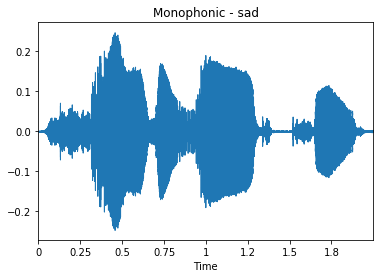

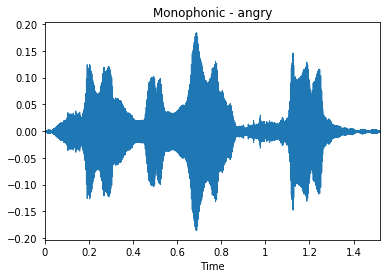

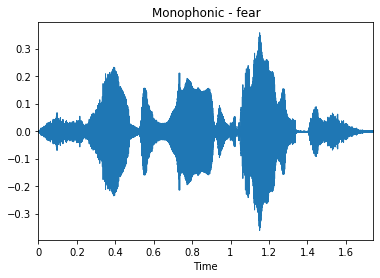

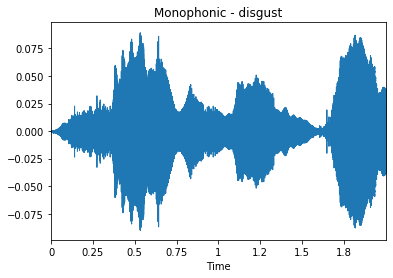

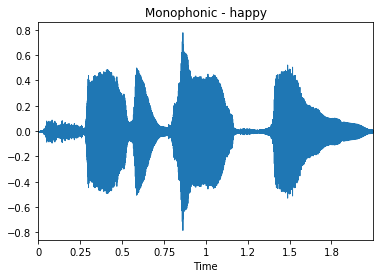

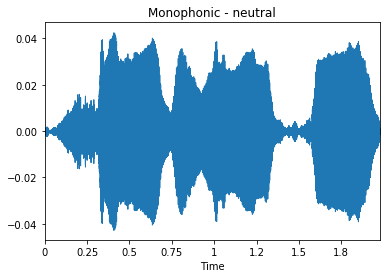

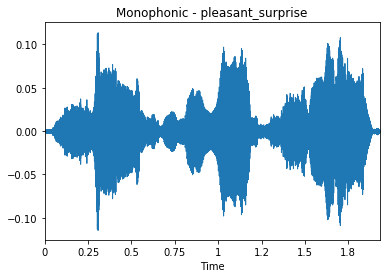

In [33]:
for cur_emotion in emotions:
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  y, sr = librosa.load(base_dir + '/' + audio_file, duration=2)
  plt.figure()
  librosa.display.waveplot(y, sr=sr)
  plt.title('Monophonic - ' + cur_emotion)

Now, We will take one audio file from each genre and plot the mel scaled spectrogram

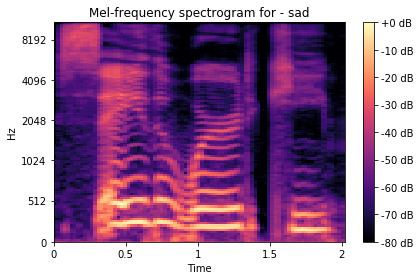

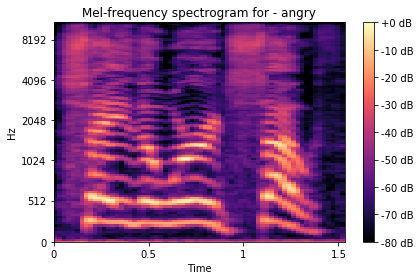

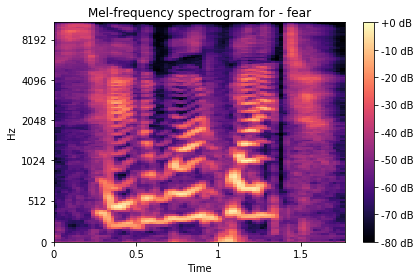

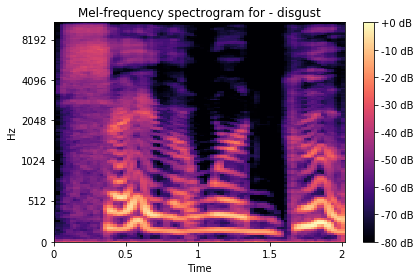

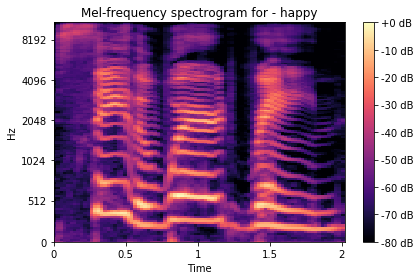

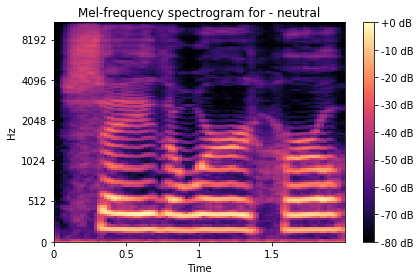

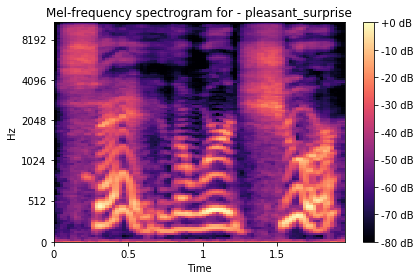

In [34]:
for cur_emotion in emotions:
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  y, sr = librosa.load(base_dir + '/' + audio_file, duration=2)
  S = librosa.feature.melspectrogram(y=y, sr=sr)
  S_dB = librosa.power_to_db(S, ref=np.max)
  plt.figure()
  librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel-frequency spectrogram for - ' + cur_emotion)
  plt.tight_layout()